<a href="https://colab.research.google.com/github/Machine-Learning-for-Finance/Machine-Learning-Algorithms/blob/master/01-Data%20Loading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd
import sklearn.datasets
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from os.path import join

# This setting makes sure that when training
# TensorFlow models it will not automatically 
# use all of the available RAM on the GPU,
# which it will do otherwise.

from os import environ
environ['TF_FORCE_GPU_ALLOW_GROWTH'] = "true"

import os
import sys
module_path = os.path.abspath(os.path.join(".."))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from utils import hello_world
hello_world()

# Loading From Google Drive

In [15]:
try:
    from google.colab import drive
    drive.mount('/content/drive')
    base_location = "/content/drive/My Drive/data/"
except:
    base_location = "/home/capcolabs/data/FannieMae/"

In [16]:
!ls /content/drive/My\ Drive/data/2010Q1

ls: cannot access '/content/drive/My Drive/data/2010Q1': No such file or directory


# Financial Datasets

There are a large number of financial datasets that are available, the first one we will discuss is the Fannie Mae Fixed Rate Mortgage Dataset.

- https://www.fanniemae.com/portal/funding-the-market/data/loan-performance-data.html

- https://loanperformancedata.fanniemae.com/lppub/index.html#Portfolio

Which consists of both Acquisitions and Performance data for a collection of mortgages.

To make our lives a bit easier here are the column names pulled from the provided `R` script to load the data.  See `R` is good for at least one thing.

In [17]:
AcquisitionColumnNames = (
    "LOAN_ID", "ORIG_CHN", "Seller.Name", 
    "ORIG_RT", "ORIG_AMT", "ORIG_TRM", "ORIG_DTE",
    "FRST_DTE", "OLTV", "OCLTV", "NUM_BO", 
    "DTI", "CSCORE_B", "FTHB_FLG", "PURPOSE", 
    "PROP_TYP", "NUM_UNIT", "OCC_STAT", "STATE", "ZIP_3", 
    "MI_PCT", "Product.Type", "CSCORE_C", "MI_TYPE", 
    "RELOCATION_FLG"
)

PerformanceColumnNames = (
    "LOAN_ID", "Monthly.Rpt.Prd", "Servicer.Name", 
    "LAST_RT", "LAST_UPB", "Loan.Age", "Months.To.Legal.Mat", 
    "Adj.Month.To.Mat", "Maturity.Date", "MSA", 
    "Delq.Status", "MOD_FLAG", "Zero.Bal.Code", 
    "ZB_DTE", "LPI_DTE", "FCC_DTE","DISP_DT", 
    "FCC_COST", "PP_COST", "AR_COST", "IE_COST", 
    "TAX_COST", "NS_PROCS","CE_PROCS", "RMW_PROCS", 
    "O_PROCS", "NON_INT_UPB", "PRIN_FORG_UPB_FHFA", 
    "REPCH_FLAG", "PRIN_FORG_UPB_OTH", "TRANSFER_FLG"
)

In [18]:
# Data path will change depending on your system setup.

acquisition_data_path = join(base_location, "2010Q1/Acquisition_2010Q1.txt")
# f"{base_location}2010Q1/Acquisition_2010Q1.txt"

#### Loading the Acquisition Data from CSV

To load the data we call from `pandas`, `pd.read_csv` which automatically handles loading data from the csv file.  We provide column names, a notification that the file doesn't include headers, and information on what the column separator is `|` in this case.

In [19]:
acquisition_df = pd.read_csv(
    acquisition_data_path,
    names=AcquisitionColumnNames,
    header=None,
    sep="|"
)

In [20]:
acquisition_df.columns

Index(['LOAN_ID', 'ORIG_CHN', 'Seller.Name', 'ORIG_RT', 'ORIG_AMT', 'ORIG_TRM',
       'ORIG_DTE', 'FRST_DTE', 'OLTV', 'OCLTV', 'NUM_BO', 'DTI', 'CSCORE_B',
       'FTHB_FLG', 'PURPOSE', 'PROP_TYP', 'NUM_UNIT', 'OCC_STAT', 'STATE',
       'ZIP_3', 'MI_PCT', 'Product.Type', 'CSCORE_C', 'MI_TYPE',
       'RELOCATION_FLG'],
      dtype='object')

#### Loading the Performance Data

In [21]:
performance_data_path = join(base_location, "2010Q1/Performance_2010Q1.txt") #
# f"{base_location}2010Q1/Performance_2010Q1.txt"


performance_df = pd.read_csv(
    performance_data_path,
    names=PerformanceColumnNames,
    header=None,
    sep="|"
)

/home/capcolabs/Stevens/Machine-Learning-Algorithms/venv/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


First thing we note is that this takes longer than the `Acquisitions` data to load, stemming from the fact that for each loan there are multiple monthly data elements loaded.

# Data Modifying

In [22]:
DS = set(performance_df['Delq.Status'])

In [23]:
print(DS)
mapper = {}
for ds in DS:
    try:
        mapper[ds] = int(ds)
    except:
        mapper[ds] = -1

performance_df['Delq.Status'] = performance_df['Delq.Status'].map(mapper)

{nan, '41', '80', '2', '62', '1', '58', '63', '71', '65', '94', '14', '68', '69', '47', '61', '89', '43', '34', '53', '93', '26', '64', '44', '59', '0', '30', '12', '4', '48', '57', '19', '67', '49', '92', '99', '22', '95', '13', '77', '56', '38', '81', '85', '46', '6', '9', '74', 'X', '36', '84', '50', '40', '11', '35', '78', '18', '97', '27', '72', '21', '54', '82', '32', '52', '70', '91', '42', '90', '29', '45', '3', '20', '16', '73', '23', '79', '60', '33', '24', '98', '51', '5', '87', '96', '31', '55', '66', '25', '7', '39', '76', '37', '17', '8', '15', '75', '88', '10', '83', '86', '28'}


In [24]:
V, C = np.unique(performance_df['Delq.Status'], return_counts=True)
print(V)

[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22
 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46
 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70
 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94
 95 96 97 98 99]


# Grouping By Loan ID

https://stackoverflow.com/questions/15705630/get-the-rows-which-have-the-max-value-in-groups-using-groupby

In [25]:
loans = performance_df.groupby("LOAN_ID", sort=True)['Delq.Status'].max()

ID_To_Delinq = {}

for row in loans.iteritems():
    loan_id, delinq = row
    ID_To_Delinq[loan_id] = delinq

In [26]:
def mapper(row):
    return ID_To_Delinq.get(row["LOAN_ID"], -1)

acquisition_df['MAX_DELINQ'] = acquisition_df.apply(mapper, axis=1)

In [27]:
V, C = np.unique(acquisition_df['MAX_DELINQ'], return_counts=True)

# Getting Forclousure Status

In [28]:
FCC_DTE = performance_df['FCC_DTE'].notna()

forclosed = performance_df[FCC_DTE]

FORECLOSURES = {}

for row in forclosed.iterrows():
    row = row[1]
    FORECLOSURES[row['LOAN_ID']] = row['FCC_DTE']

FORCLOSED = set(forclosed['LOAN_ID'])

def mapper(row):
    # return FORECLOSURES.get(row['LOAN_ID'], "NO_FCC")
    return int(row['LOAN_ID'] in FORCLOSED)

acquisition_df['FCC'] = acquisition_df.apply(mapper, axis=1)

In [29]:
print(set(acquisition_df['FCC']))

{0, 1}


## Getting Delinquency Status

In [30]:
V, C = np.unique(
    performance_df['Monthly.Rpt.Prd'], 
    return_counts=True
)

In [31]:
actual_date = performance_df['Monthly.Rpt.Prd'] == "01/01/2015"
next_date   = performance_df['Monthly.Rpt.Prd'] == "01/01/2016"

date_df = performance_df[actual_date]
next_df = performance_df[next_date]

Delinquency = {}
Next_Delinquency = {}

for row in date_df.iterrows():
    row = row[1]
    Delinquency[row['LOAN_ID']] = ID_To_Delinq.get(row["LOAN_ID"], -1)
    
for row in next_df.iterrows():
    row = row[1]
    Next_Delinquency[row['LOAN_ID']] = ID_To_Delinq.get(row['LOAN_ID'], -1)

In [32]:
def mapper(row):
    return Delinquency.get(row["LOAN_ID"], -1)

def next_mapper(row):
    return Next_Delinquency.get(row['LOAN_ID'], -1)

acquisition_df['DELINQ_DATE'] = acquisition_df.apply(mapper, axis=1)

acquisition_df['DELINQ_NEXT'] = acquisition_df.apply(next_mapper, axis=1 )

In [33]:
delinq = acquisition_df['DELINQ_DATE'] > 0
delinq_df = acquisition_df[delinq]

print(f"{len(delinq_df.index)}")

def check_date_range(row):
    return row['DELINQ_NEXT'] >= row['DELINQ_DATE']

delinq_df['DELINQ_DELTA'] = delinq_df.apply(
    check_date_range,
    axis=1
)

20303


/home/capcolabs/Stevens/Machine-Learning-Algorithms/venv/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [34]:
V, C = np.unique(delinq_df['DELINQ_DELTA'], return_counts=True)

for v, c in zip(V, C):
    print(v, " | ", c)

False  |  2219
True  |  18084


In [35]:
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import confusion_matrix
import seaborn as sns


def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           #xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [36]:
df = delinq_df

DEL_NOTNAN = df["DELINQ_DELTA"].notna()
df = df[DEL_NOTNAN]
OLTV = df['OLTV'].notna()
df = df[OLTV]
CS = df['CSCORE_B'].notna()
df = df[CS]
DTI = df['DTI'].notna()
df = df[DTI]

credit_score  = np.array(df['CSCORE_B'])
loan_to_value = np.array(df['OLTV'])
debt_to_income= np.array(df['DTI'])
delinq_value  = np.array(df['DELINQ_DATE'])

max_delinq    = np.array(df['DELINQ_DELTA'])
foreclosed    = np.array(df['FCC'])

X = np.array(
    [
        credit_score, 
        loan_to_value, 
        debt_to_income, 
        delinq_value
    ]
).transpose()

y = np.array([foreclosed]).transpose()
print(X.shape)
print(y.shape)

Total = np.hstack([X, y])
print(Total.shape)
np.random.shuffle(Total)

X = Total[:, :4]
y = Total[:, 4:]

print(X.shape)
print(y.shape)

prop = 0.9
train_num = int(prop * len(Total))
print(f"Train Number: {train_num}")

X_train, X_test = X[:train_num], X[train_num:]
y_train, y_test = y[:train_num], y[train_num:]

print(f"X_Train: {X_train.shape}")
print(f"X_Test: {X_test.shape}")
print("=="*10)
print(f"y_Train: {y_train.shape}")
print(f"y_Test:  {y_test.shape}")

V, C = np.unique(y, return_counts=True)

class_weight = {}
for v, c in zip(V, C):
    prop = c / len(y)
    class_weight[v] = 1 - prop
    print(v, " | ", c)

class_names = np.unique(y)

print(class_names)

(20038, 4)
(20038, 1)
(20038, 5)
(20038, 4)
(20038, 1)
Train Number: 18034
X_Train: (18034, 4)
X_Test: (2004, 4)
y_Train: (18034, 1)
y_Test:  (2004, 1)
0.0  |  19397
1.0  |  641
[0. 1.]


# Decision Tree

In [38]:
from sklearn import tree

dtc = tree.DecisionTreeClassifier(class_weight=class_weight)
dtc = dtc.fit(
    X_train, y_train
)
print(dtc.score(X_test, y_test))
print(dtc.feature_importances_)

0.9565868263473054
[0.09188617 0.04957543 0.0537882  0.8047502 ]


Normalized confusion matrix
[[0.97838394 0.02161606]
 [0.73770492 0.26229508]]


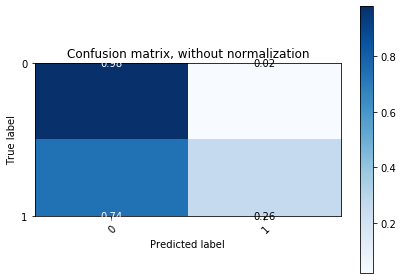

In [39]:
y_pred = dtc.predict(X_test)

plot = plot_confusion_matrix(
    y_test, y_pred, classes=class_names,
    normalize=True,
    title='Confusion matrix, without normalization'
)
plt.show(plot)

# Nearest Neighbors

Taken from: https://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbors-classification

>Neighbors-based classification is a type of instance-based learning or non-generalizing learning: it does not attempt to construct a general internal model, but simply stores instances of the training data. Classification is computed from a simple majority vote of the nearest neighbors of each point: a query point is assigned the data class which has the most representatives within the nearest neighbors of the point.

>scikit-learn implements two different nearest neighbors classifiers: KNeighborsClassifier implements learning based on the
nearest neighbors of each query point, where is an integer value specified by the user. RadiusNeighborsClassifier implements learning based on the number of neighbors within a fixed radius of each training point, where

>is a floating-point value specified by the user.

>The
>-neighbors classification in KNeighborsClassifier is the most commonly used technique. The optimal choice of the value is >highly data-dependent: in general a larger

>suppresses the effects of noise, but makes the classification boundaries less distinct.

>In cases where the data is not uniformly sampled, radius-based neighbors classification in RadiusNeighborsClassifier can be a better choice. The user specifies a fixed radius

>, such that points in sparser neighborhoods use fewer nearest neighbors for the classification. For high-dimensional parameter spaces, this method becomes less effective due to the so-called “curse of dimensionality”.

>The basic nearest neighbors classification uses uniform weights: that is, the value assigned to a query point is computed from a simple majority vote of the nearest neighbors. Under some circumstances, it is better to weight the neighbors such that nearer neighbors contribute more to the fit. This can be accomplished through the weights keyword. The default value, weights = 'uniform', assigns uniform weights to each neighbor. weights = 'distance' assigns weights proportional to the inverse of the distance from the query point. Alternatively, a user-defined function of the distance can be supplied to compute the weights.

In [40]:
from sklearn import neighbors


n_neighbors = 15


knn = neighbors.KNeighborsClassifier(n_neighbors, weights="uniform")
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))


0.967564870259481


/home/capcolabs/Stevens/Machine-Learning-Algorithms/venv/lib/python3.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


Normalized confusion matrix
[[0.99382398 0.00617602]
 [0.86885246 0.13114754]]


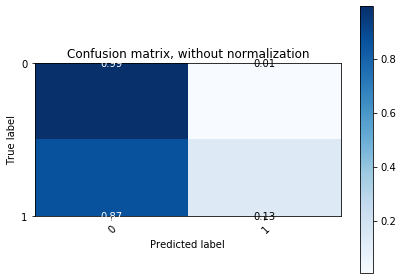

In [41]:
y_pred = knn.predict(X_test)

plot = plot_confusion_matrix(
    y_test, y_pred, classes=class_names,
    normalize=True,
    title='Confusion matrix, without normalization'
)
plt.show(plot)

# Random Forest Classifier

In [42]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(
    n_estimators=10,
    class_weight=class_weight
)
rfc = rfc.fit(
    X_train, y_train
)
print(rfc.score(X_test, y_test))
print(rfc.feature_importances_)

0.9700598802395209
[0.07805358 0.06879675 0.06340836 0.78974131]


/home/capcolabs/Stevens/Machine-Learning-Algorithms/venv/lib/python3.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Normalized confusion matrix
[[0.99588266 0.00411734]
 [0.85245902 0.14754098]]


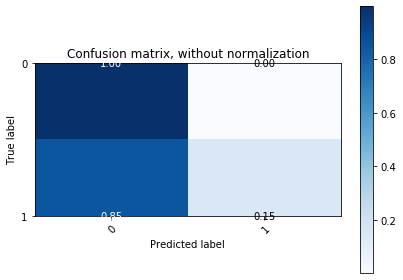

In [43]:
y_pred = rfc.predict(X_test)

plot = plot_confusion_matrix(
    y_test, y_pred, classes=class_names,
    normalize=True,
    title='Confusion matrix, without normalization'
)
plt.show(plot)

# Neural Network Example

In [44]:
import tensorflow as tf

In [45]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
test_dataset  = tf.data.Dataset.from_tensor_slices((X_test, y_test))

BATCH_SIZE = 64
SHUFFLE_BUFFER_SIZE = 100
V = np.unique(y)

train_dataset = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
test_dataset  = test_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)

print(train_dataset)

<BatchDataset shapes: ((None, 4), (None, 1)), types: (tf.float64, tf.float64)>


In [46]:
print(len(V))

print(class_weight)

2
{0.0: 0.03198922048108599, 1.0: 0.9680107795189141}


In [47]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, input_shape=[4]),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=["accuracy"]
)

In [48]:
history = model.fit(
    train_dataset, 
    validation_data=test_dataset,
    class_weight=class_weight,
    epochs=2
)

Epoch 1/2
282/282 [==============================] - 1s 5ms/step - loss: 0.8838 - accuracy: 0.9534 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/2
282/282 [==============================] - 1s 2ms/step - loss: 0.2666 - accuracy: 0.9613 - val_loss: 0.2935 - val_accuracy: 0.9361


In [49]:
print(history.history)

{'loss': [0.8834254654322361, 0.26622600499641264], 'accuracy': [0.95336586, 0.9612953], 'val_loss': [0.6101864047340684, 0.2935210014693439], 'val_accuracy': [0.96906185, 0.9361277]}


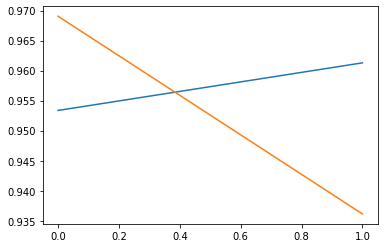

In [50]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

Normalized confusion matrix
[[0.94081318 0.05918682]
 [0.21311475 0.78688525]]


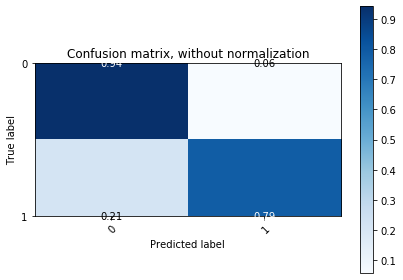

In [51]:
y_pred = model.predict_classes(X_test)

plot = plot_confusion_matrix(
    y_test, y_pred, classes=class_names,
    normalize=True,
    title='Confusion matrix, without normalization'
)
plt.show(plot)

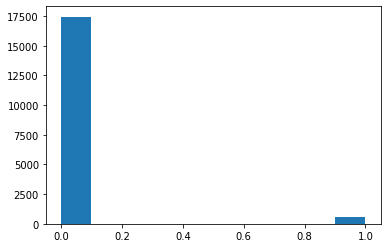

In [52]:
X = plt.hist(y_train)
plt.show(X)

In [53]:
pred = model.predict_classes(X_test)

CM = [[0,0],[0,0]]

for idx, p in enumerate(pred):
    actual = y_test[idx]
    CM[int(p)][int(actual)] += 1

In [54]:
import seaborn as sn

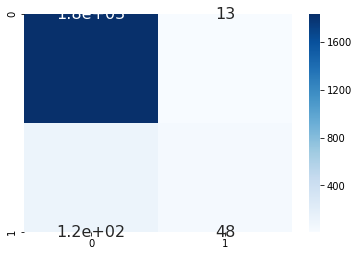

In [55]:
sn.heatmap(
    CM, 
    cmap="Blues", 
    annot=True,
    annot_kws={"size": 16}
)# font size

In [56]:
model.save('my_model.h5') 